## **Assignment 3: Clustering**
### Stefan Dimitrov Velev, 0MI3400521, Big Data Technologies
### Faculty of Mathematics and Informatics, Sofia University

In [1]:
# Import required Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
# Read the given CSV file
df = pd.read_csv('./data/data_assignment3.csv', delimiter=',')

In [3]:
df.head()

residue name  position chain         phi         psi
0          LYS        10     A -149.312855  142.657714
1          PRO        11     A  -44.283210  136.002076
2          LYS        12     A -119.972621 -168.705263
3          LEU        13     A -135.317212  137.143523
4          LEU        14     A -104.851467   95.928520

In [4]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 29369


In [5]:
df.describe()

position           phi           psi
count  29369.000000  29369.000000  29369.000000
mean     182.917634    -82.362440     64.251961
std      130.180669     56.848421     91.119597
min        1.000000   -179.991175   -179.995255
25%       84.000000   -118.089883    -24.299401
50%      151.000000    -85.198070    110.903019
75%      257.000000    -63.287290    141.154709
max      772.000000    179.973856    179.986259

### **Task 1: Show the distribution of phi and psi combinations using:**

#### ***a. A scatter plot***

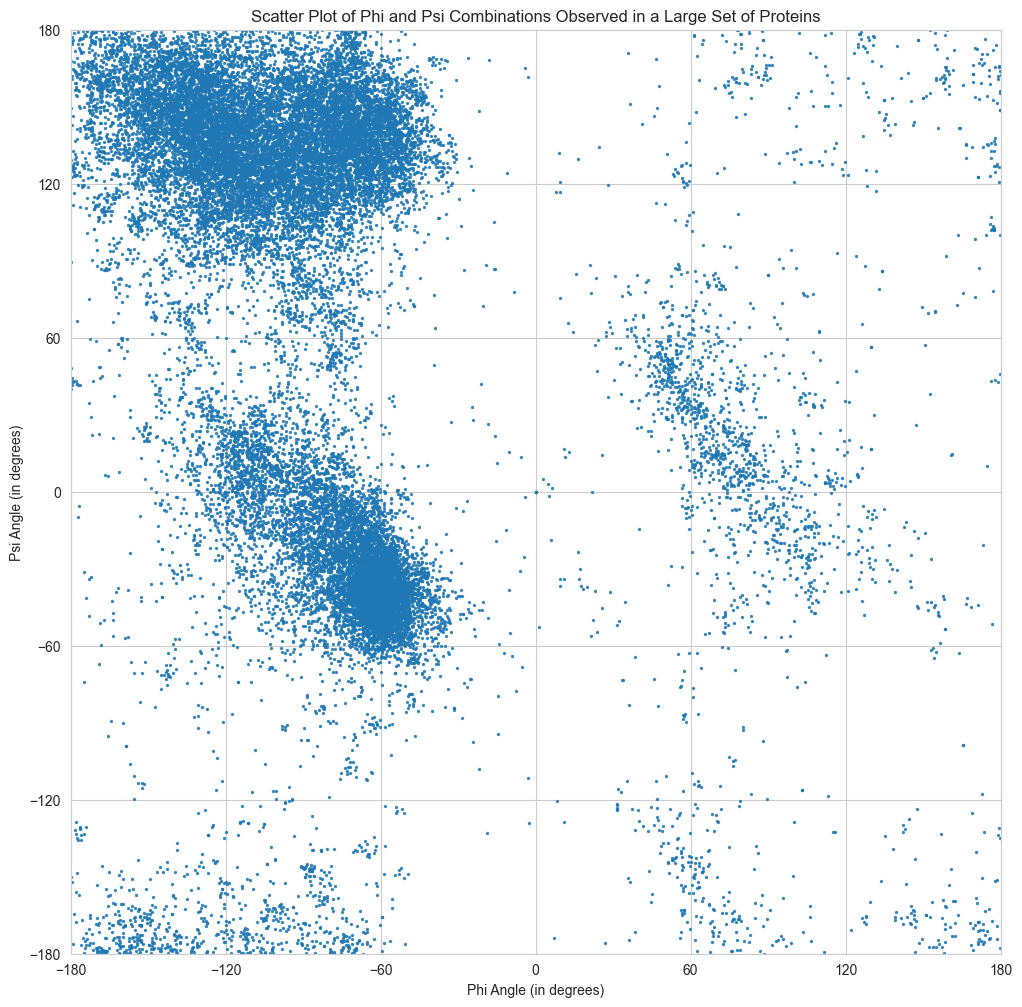

In [6]:
# Draw scatter plot of the data
plt.figure(figsize=(12, 12))
plt.scatter(df['phi'], df['psi'], s = 2, alpha = 0.8)
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.xticks(range(-180, 181, 60))
plt.yticks(range(-180, 181, 60))
plt.xlabel('Phi Angle (in degrees)')
plt.ylabel('Psi Angle (in degrees)')

plt.title('Scatter Plot of Phi and Psi Combinations Observed in a Large Set of Proteins')
plt.show()

#### ***b. A 2D histogram***

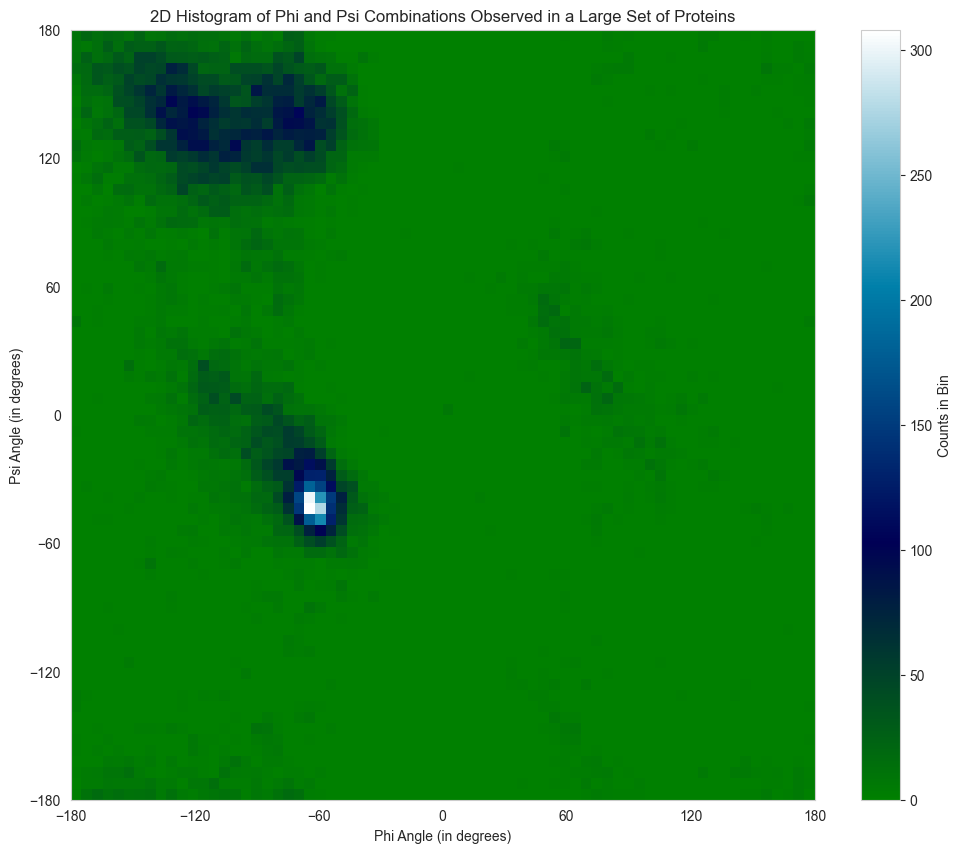

In [7]:
# Draw 2D histogram of the data
plt.figure(figsize=(12, 10))
plt.hist2d(df['phi'], df['psi'], bins = 70, cmap='ocean')
plt.xticks(range(-180, 181, 60))
plt.yticks(range(-180, 181, 60))
plt.colorbar(label = "Counts in Bin")
plt.xlabel('Phi Angle (in degrees)')
plt.ylabel('Psi Angle (in degrees)')
plt.title('2D Histogram of Phi and Psi Combinations Observed in a Large Set of Proteins')
plt.show()

### **Task 2: Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.**

In [8]:
X = df[['phi', 'psi']]

In [9]:
# List that stores the sum of squared distances of samples to their closest cluster center, weighted by the sample weights if given
inertia = []

In [10]:
def visualise_kmeans(k):
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    inertia.append(kmeans.inertia_)

    plt.figure(figsize=(9, 9))
    plt.scatter(X['phi'], X['psi'], c = y_kmeans, s = 2, alpha = 0.8, cmap = 'viridis')
    plt.xlim(-180, 180)
    plt.ylim(-180, 180)
    plt.xticks(range(-180, 181, 60))
    plt.yticks(range(-180, 181, 60))
    plt.xlabel('Phi Angle (in degrees)')
    plt.ylabel('Psi Angle (in degrees)')

    plt.title(f'KMeans Clustering with k = {k} on Phi and Psi Combinations Observed in a Large Set of Proteins')
    plt.show()
    # plt.scatter(X['phi'], X['psi'], c = y_kmeans, s = 2, alpha = 0.8, cmap = 'viridis')

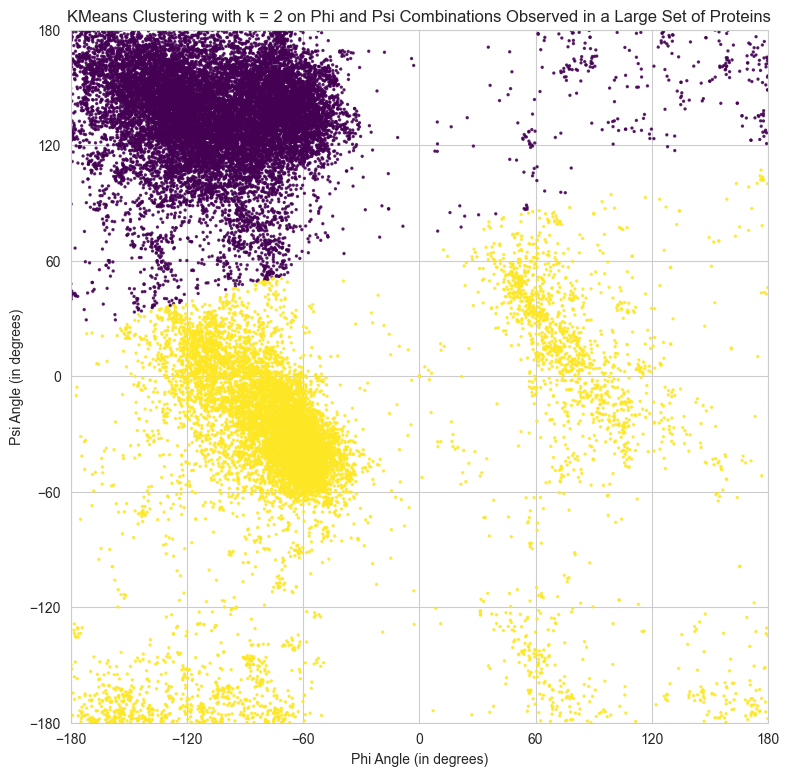

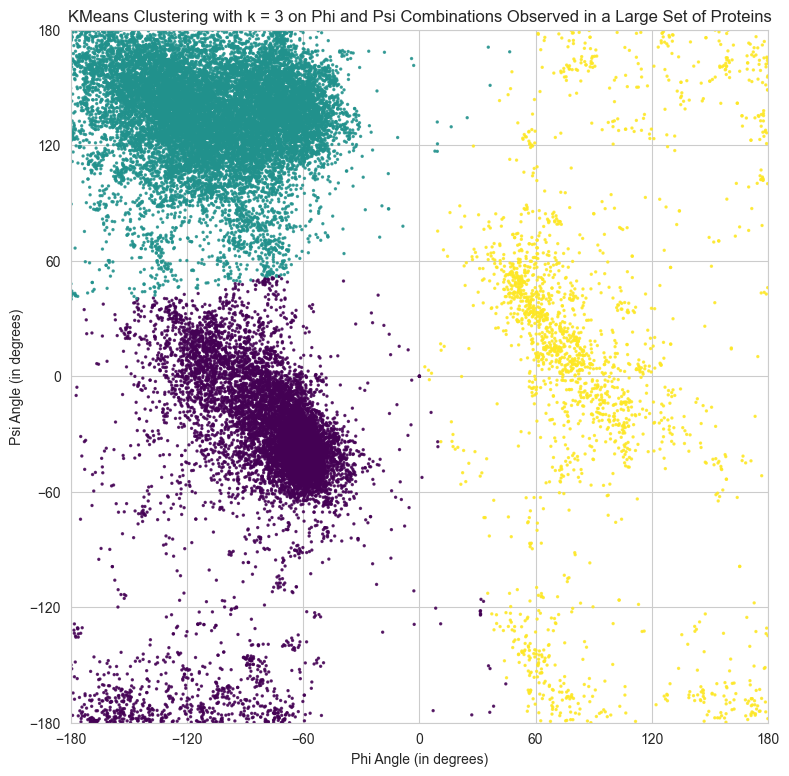

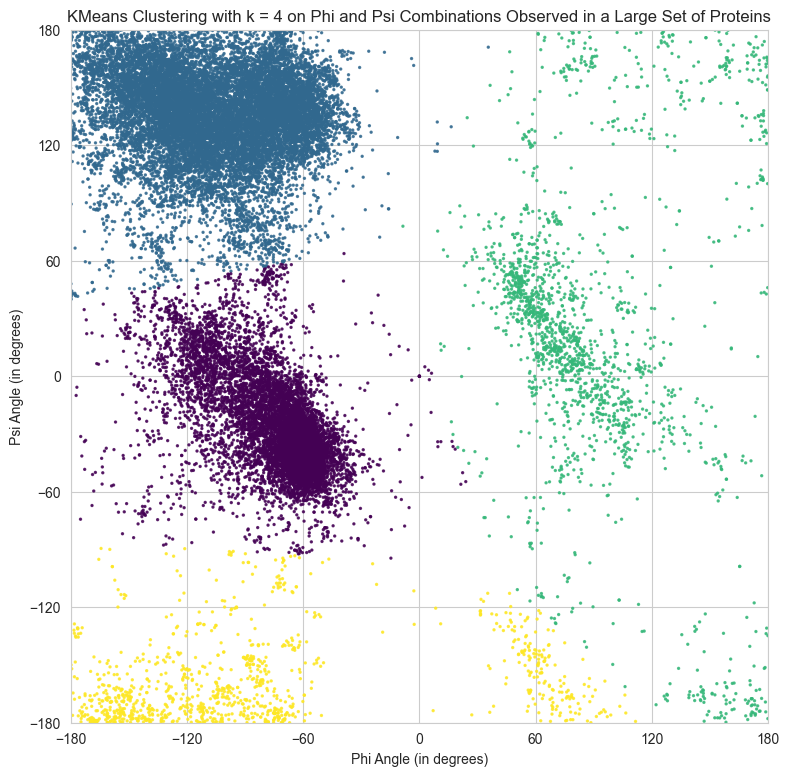

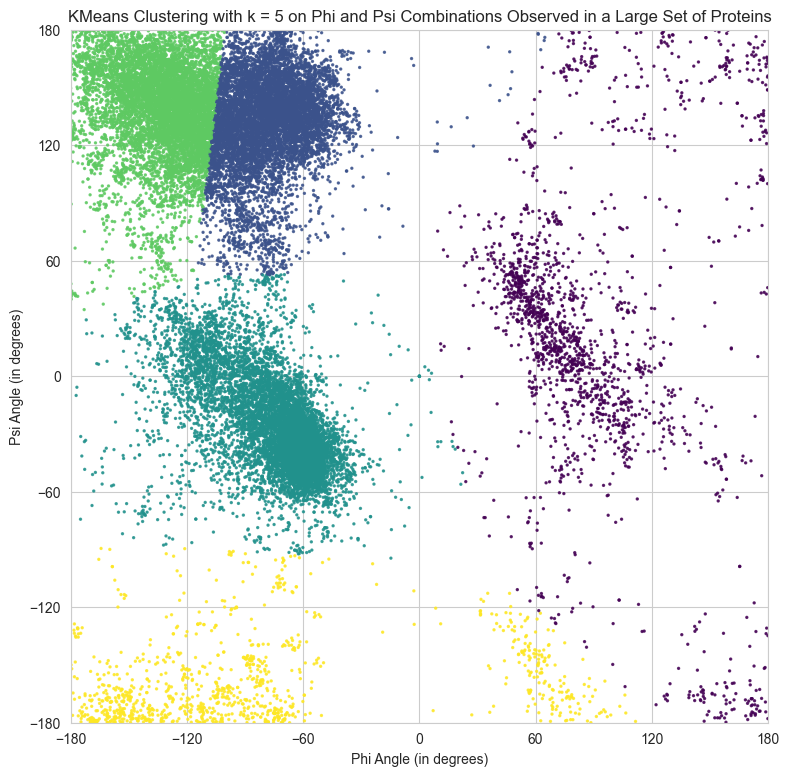

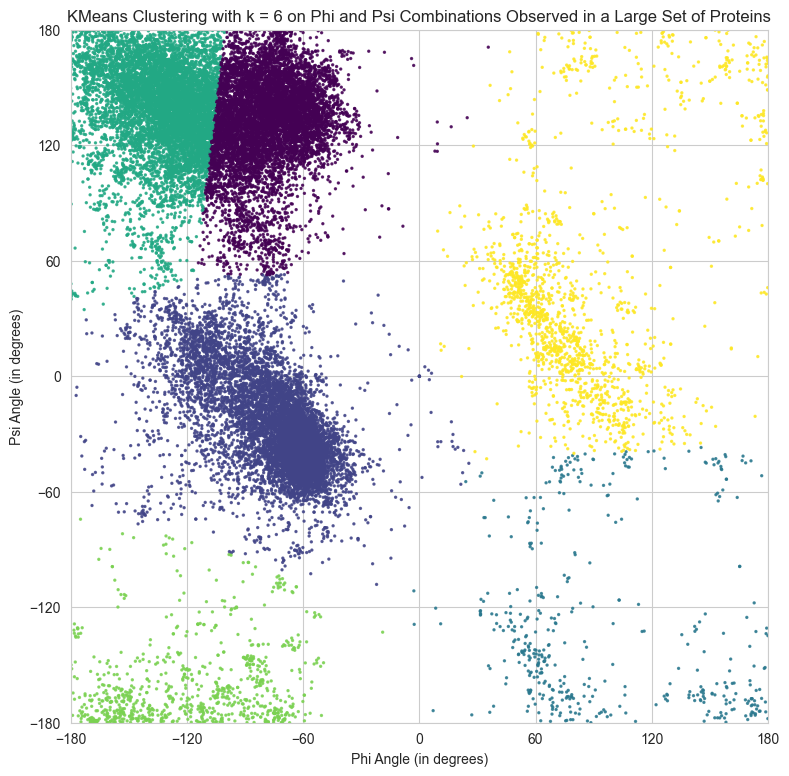

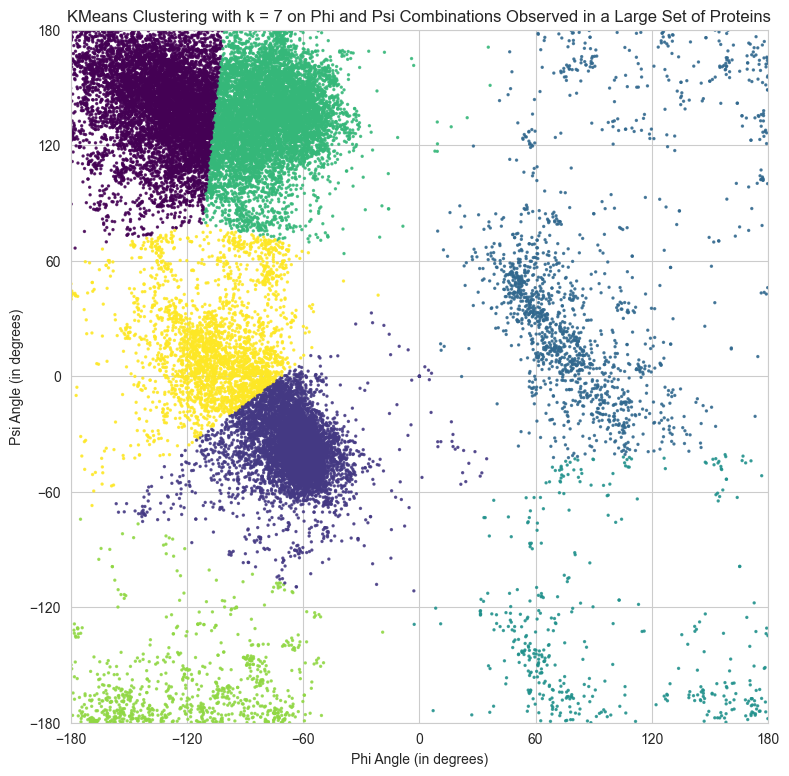

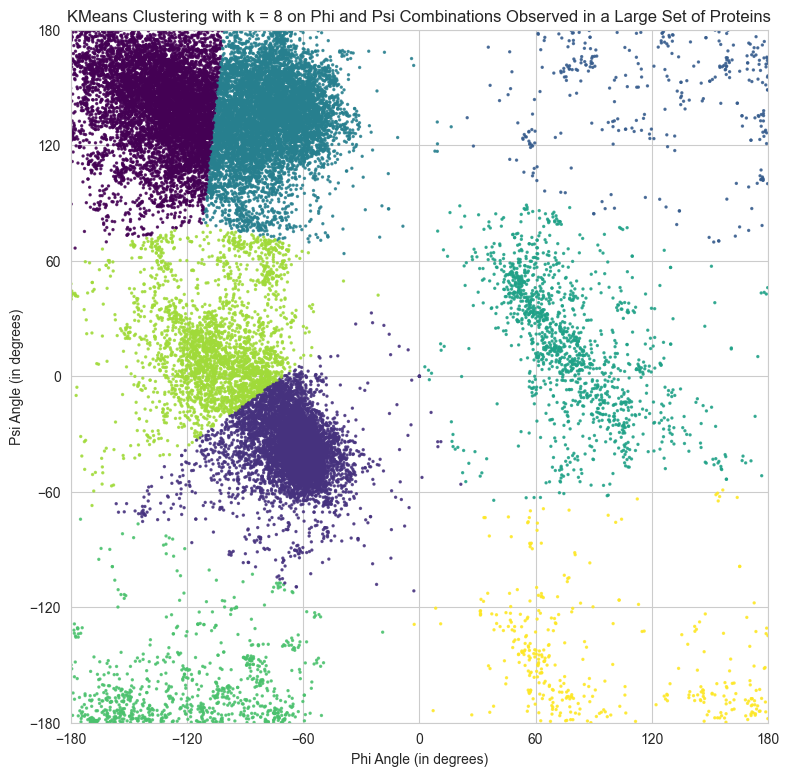

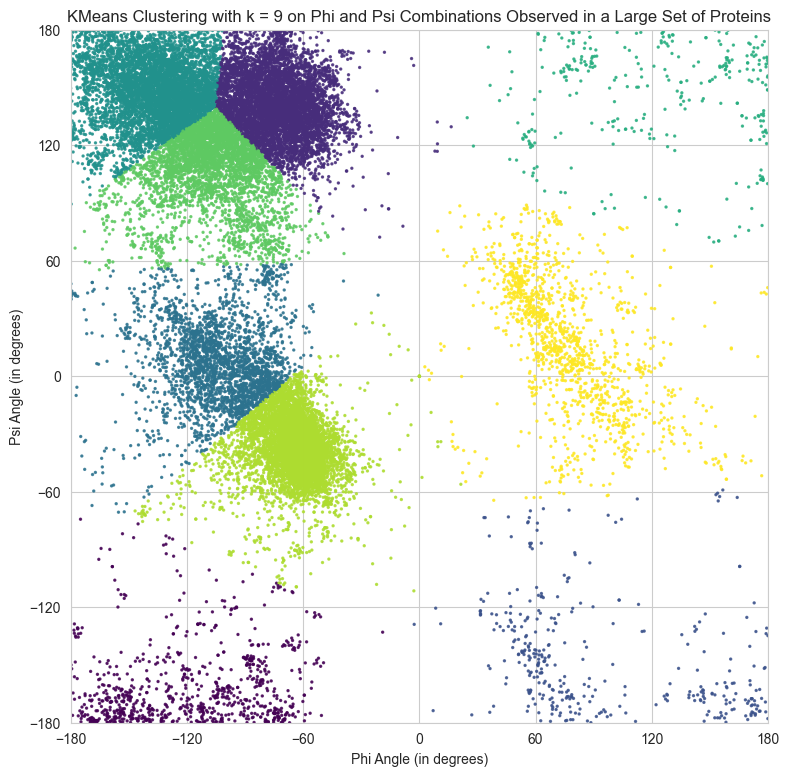

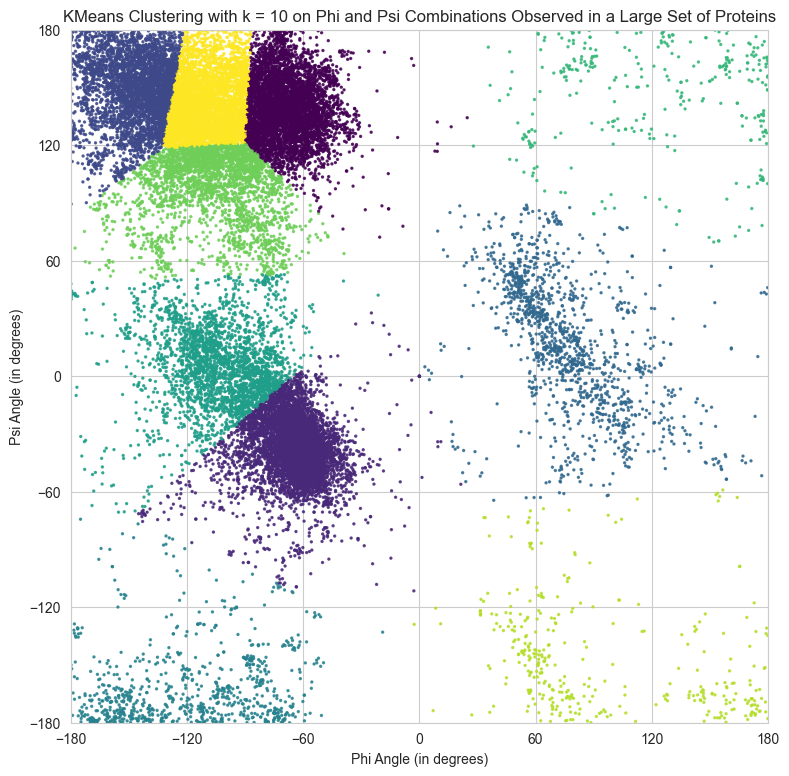

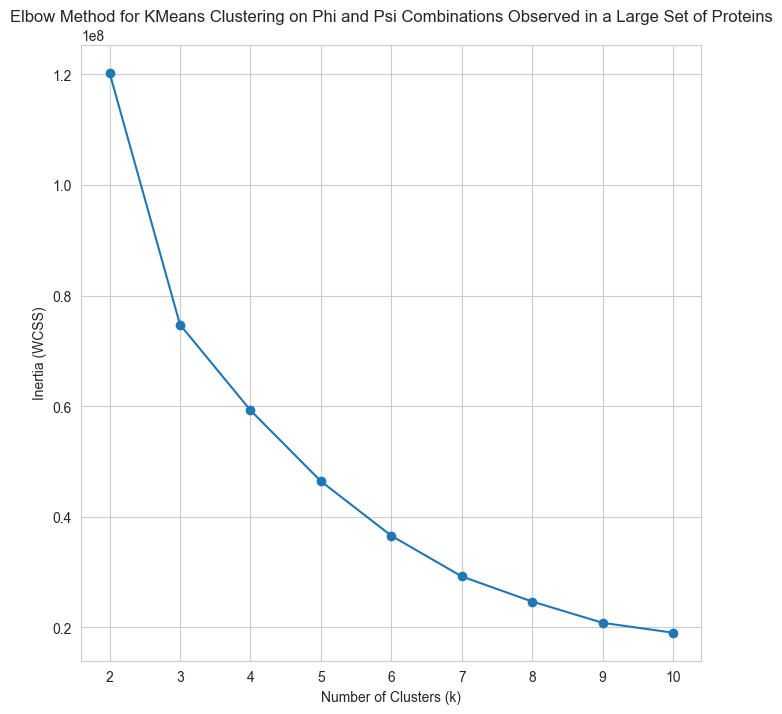

In [11]:
for k in range(2, 11):
    visualise_kmeans(k)

plt.figure(figsize=(8, 8))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for KMeans Clustering on Phi and Psi Combinations Observed in a Large Set of Proteins')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.show()

In [12]:
# Transform to polar coordinates to tackle problem with periodicity
phi = df['phi'].values
psi = df['psi'].values

phi_cos = np.cos(np.radians(phi))
phi_sin = np.sin(np.radians(phi))
psi_cos = np.cos(np.radians(psi))
psi_sin = np.sin(np.radians(psi))

X_polar = np.column_stack((phi_cos, phi_sin, psi_cos, psi_sin))
inertia = []

In [13]:
def visualise_kmeans_polar(k):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state=98)
    kmeans.fit(X_polar)
    y_kmeans = kmeans.predict(X_polar)
    inertia.append(kmeans.inertia_)

    plt.figure(figsize=(9, 9))
    plt.scatter(X['phi'], X['psi'], c=y_kmeans, s=2, alpha=0.8, cmap='viridis')
    plt.xlim(-180, 180)
    plt.ylim(-180, 180)
    plt.xticks(range(-180, 181, 60))
    plt.yticks(range(-180, 181, 60))
    plt.xlabel('Phi Angle (in degrees)')
    plt.ylabel('Psi Angle (in degrees)')

    plt.title(f'KMeans Clustering with k = {k} based on Phi and Psi Polar Coordinates Observed in a Large Set of Proteins')
    plt.show()

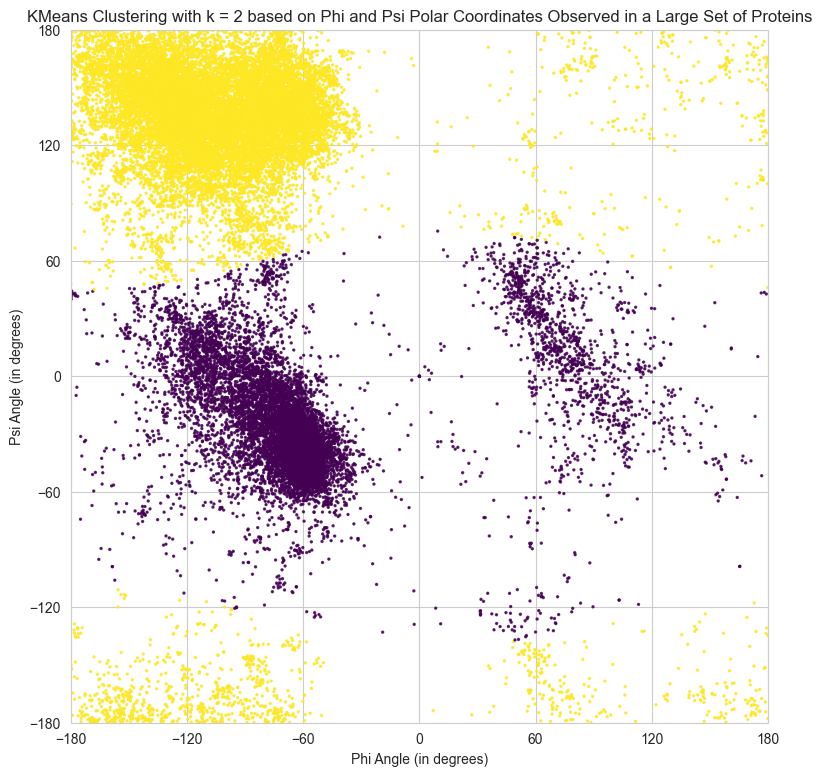

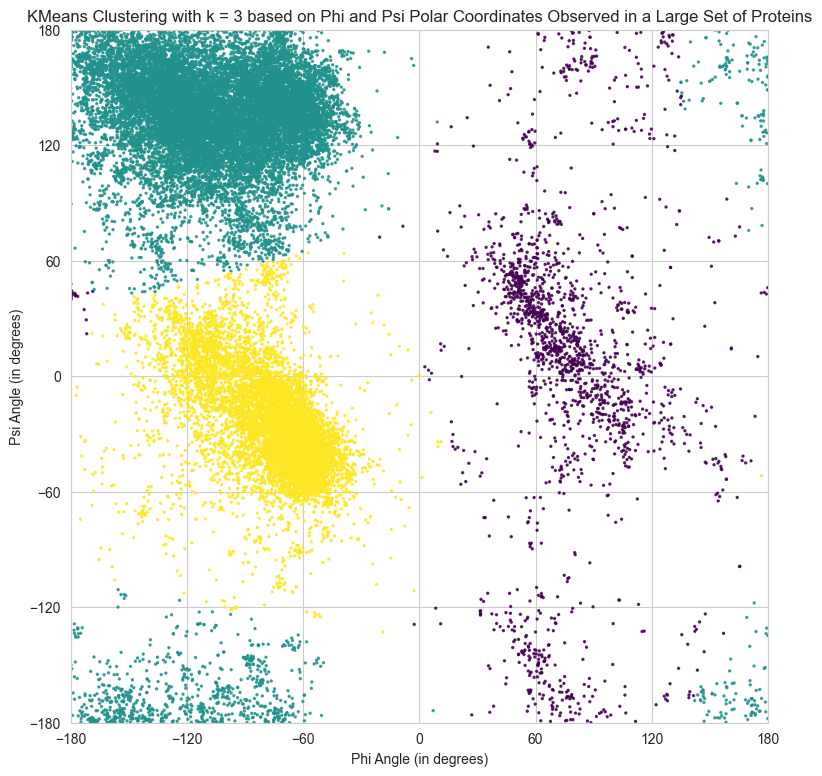

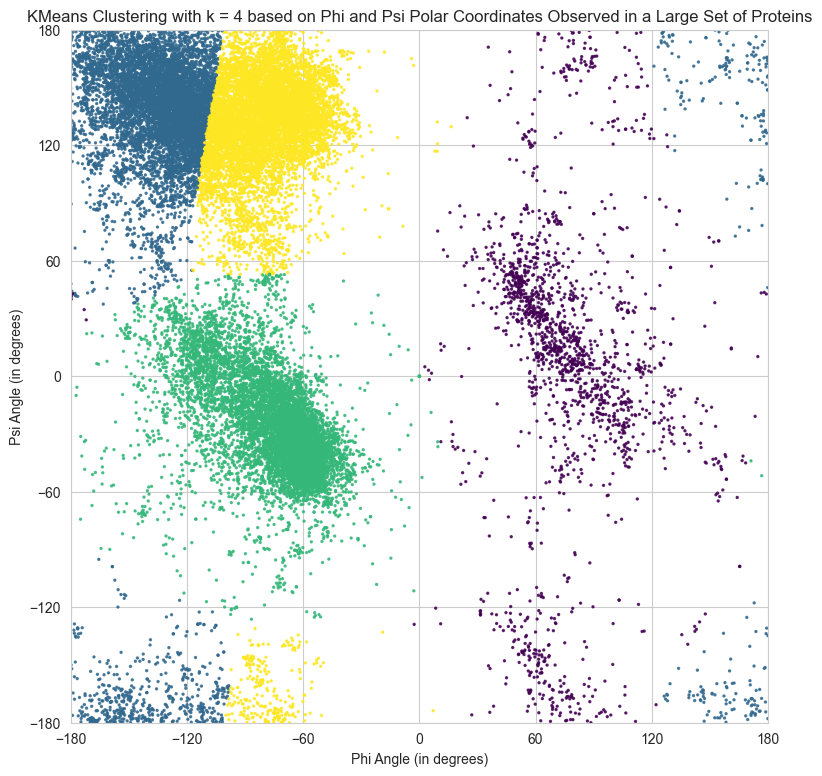

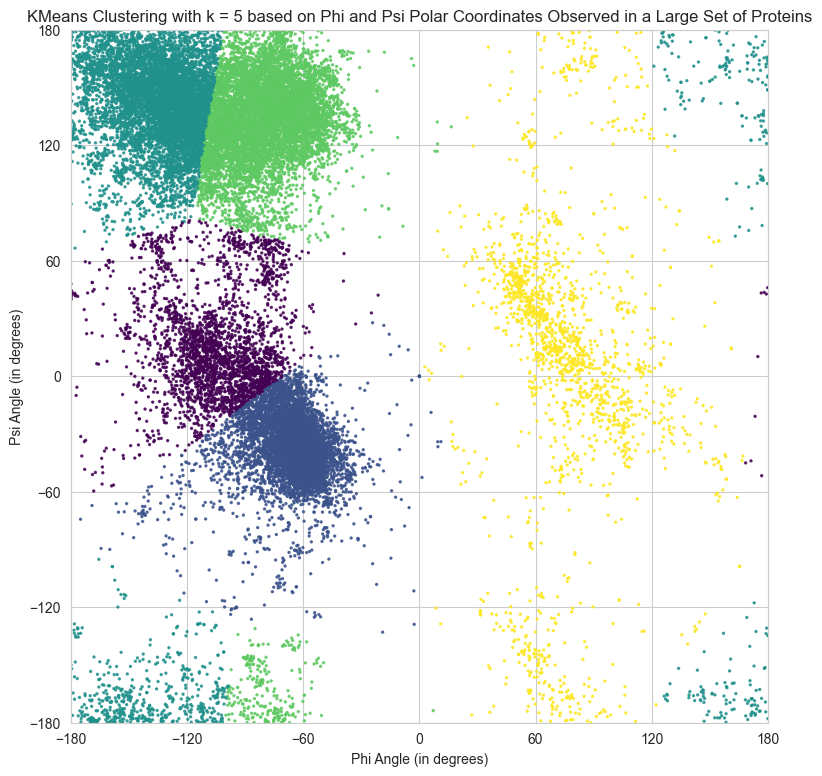

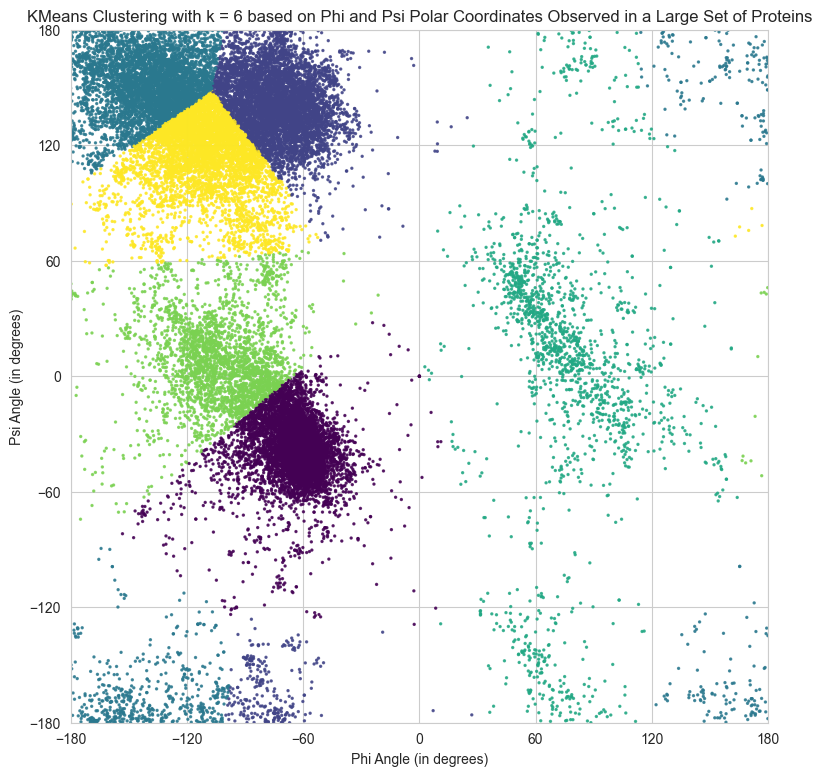

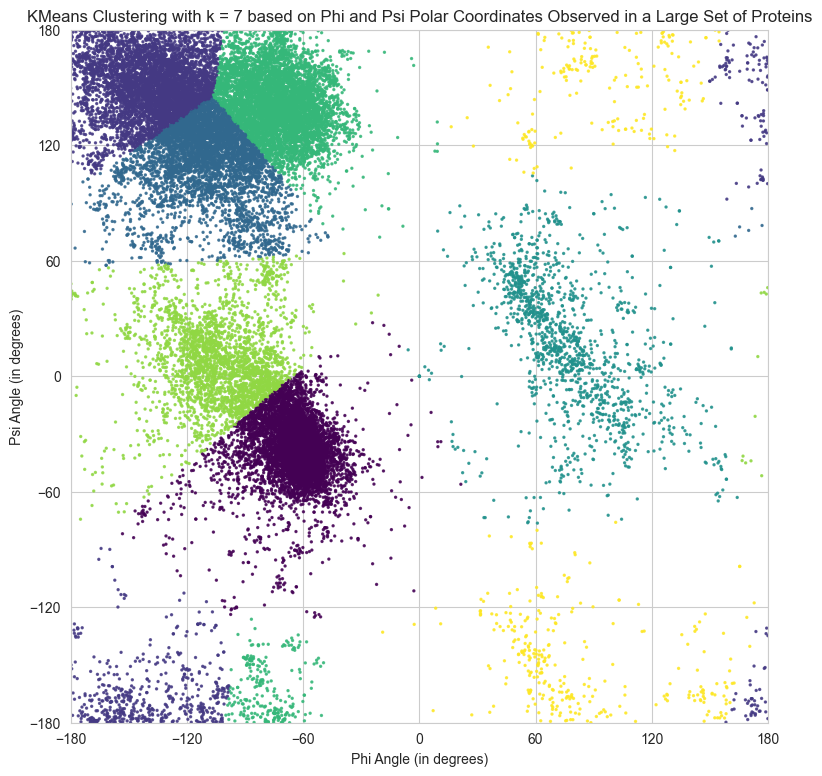

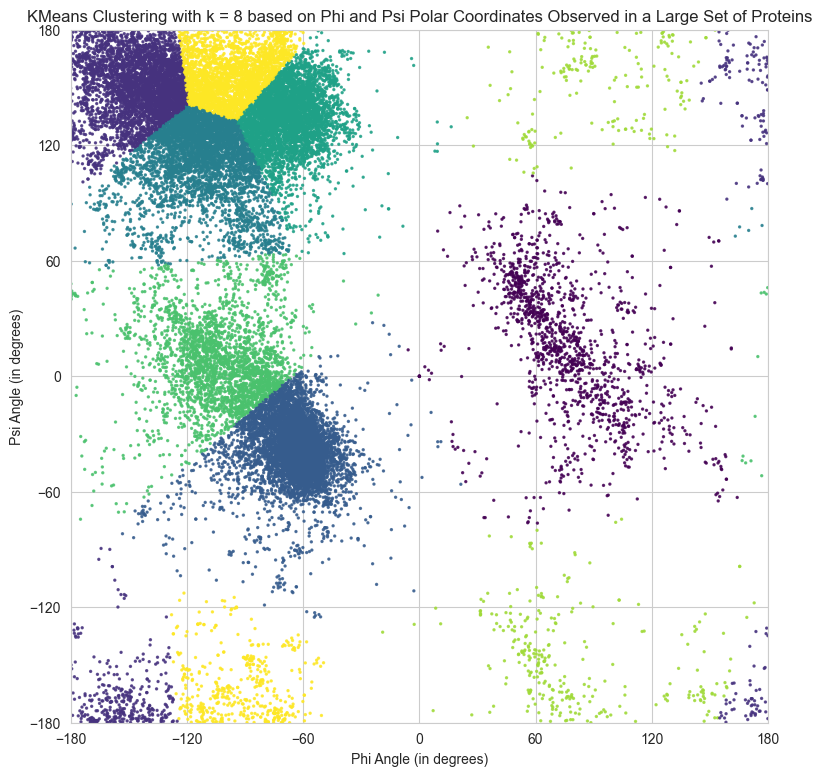

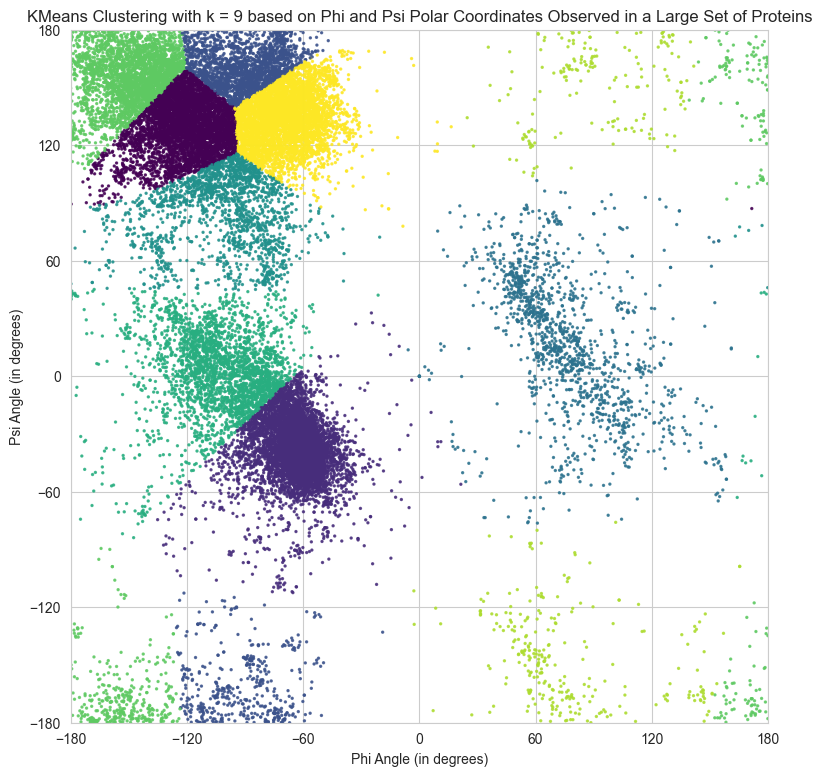

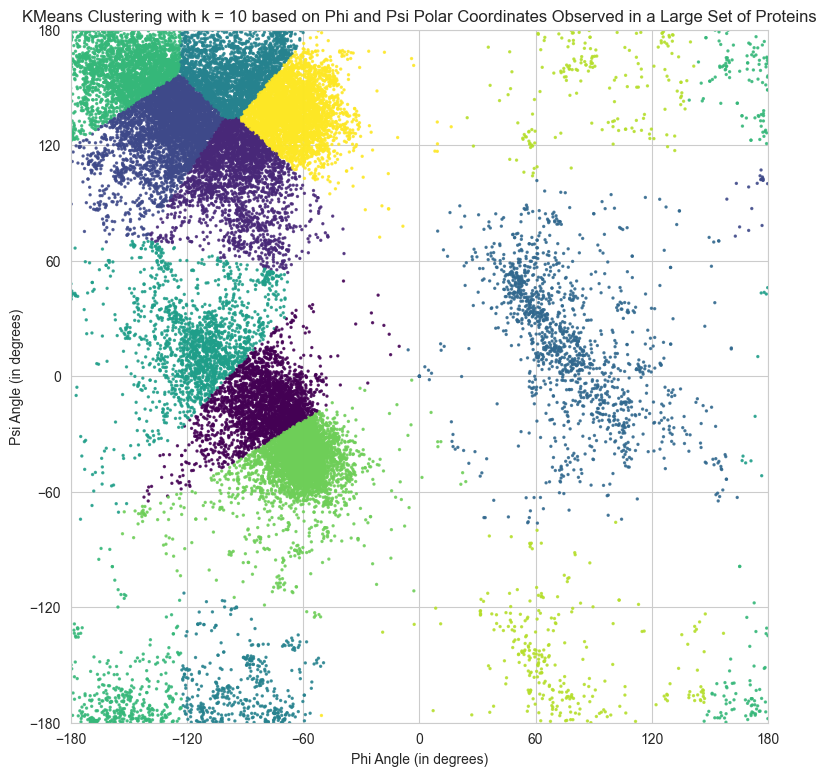

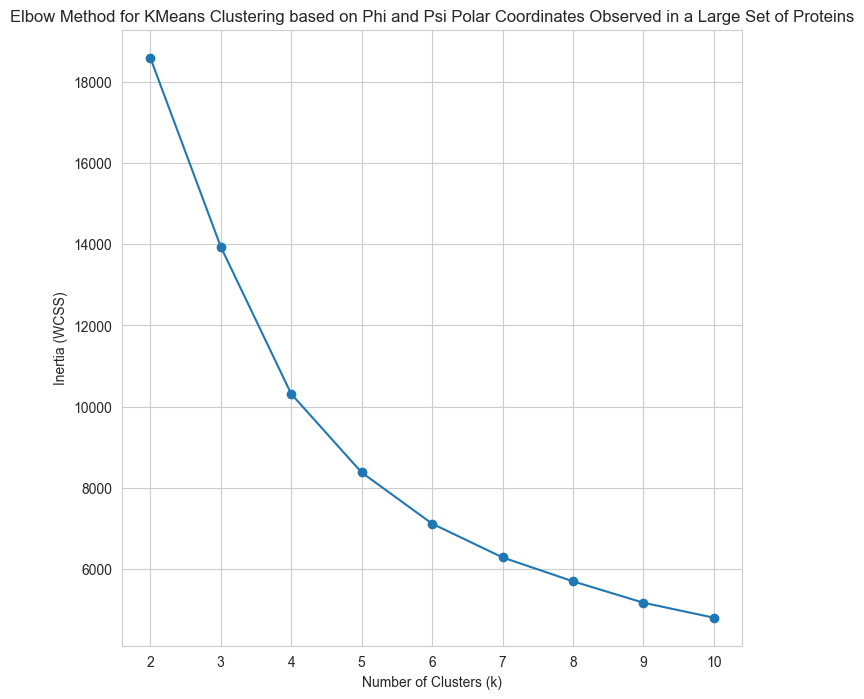

In [14]:
for k in range(2, 11):
    visualise_kmeans_polar(k)

plt.figure(figsize=(8, 8))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for KMeans Clustering based on Phi and Psi Polar Coordinates Observed in a Large Set of Proteins')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.show()

### **Task 3: Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.**